<a href="https://colab.research.google.com/github/PLEX-GR00T/Data_Mining/blob/main/CNN_Model_Olivetti_faces_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data and visualize it.

In [93]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

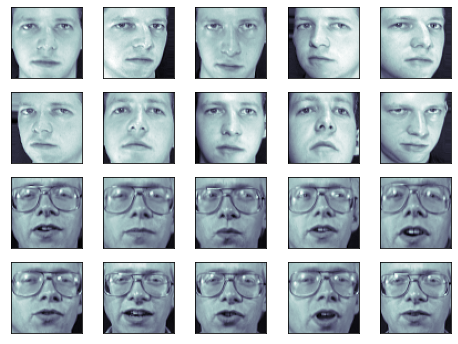

In [146]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

# Augmentations 

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform 
from skimage.transform import rotate, AffineTransform
from skimage.util import random_noise

In [95]:
data_ = faces.images.tolist()

In [173]:
sh = AffineTransform(shear=-0.5)
rotate = (rotate(faces.images, angle=0.9)).tolist()
up_down = (np.flipud(faces.images)).tolist()
shear1 = (transform.warp(faces.images, sh, order=1, preserve_range=True, mode='wrap')).tolist()
left_right = (np.fliplr(faces.images)).tolist()
noised = (random_noise(faces.images, var=0.1**2)).tolist()

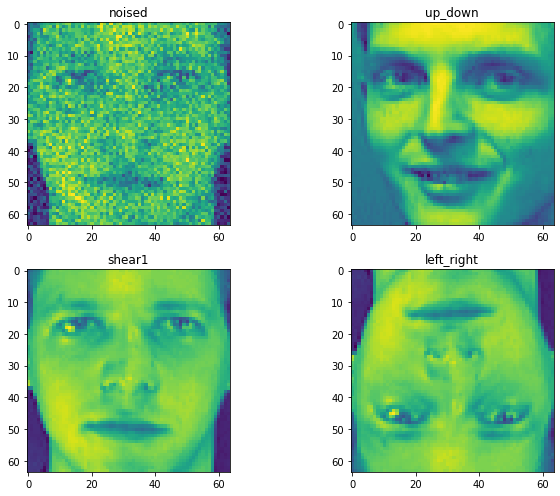

In [176]:
fig = plt.figure(tight_layout='auto', figsize=(10, 7))

fig.add_subplot(221)
plt.title('noised')
plt.imshow(noised[0])

fig.add_subplot(222)
plt.title('up_down')
plt.imshow(up_down[0])

fig.add_subplot(223)
plt.title('shear1')
plt.imshow(shear1[0])

fig.add_subplot(224)
plt.title('left_right')
plt.imshow(left_right[0])


plt.show()

## Add Augmented data to the original dataset.

In [177]:
dataset = data_+rotate+up_down+shear1+left_right+noised

## Add target values to the final Target list of augmented dataset

In [178]:
flag = faces.target.tolist()

In [179]:
target = flag + flag + flag + flag + flag +flag
print(target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27,

In [180]:
len(dataset)

2400

In [181]:
X = np.array(dataset)
type(X)

numpy.ndarray

In [182]:
y = np.array(target)
type(y)

numpy.ndarray

In [183]:
X.shape

(2400, 64, 64)

In [184]:
y.shape

(2400,)

#CNN Model 

In [185]:
import tensorflow as tf
from tensorflow.keras import layers

In [106]:
# split into train and test
# np.random.shuffle(new_data)
#n_train = 1600
#trainX, testX = X[:n_train, :], X[n_train:, :]
#trainy, testy = y[:n_train], y[n_train:]

## Split the data

In [186]:
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(
    X, y, random_state=20, shuffle=True, test_size=0.2)

print(trainX.shape, testX.shape)

(1920, 64, 64) (480, 64, 64)


# Check the data is in MinMaxScaler or not

In [187]:
print('Data Type: %s' % trainX.dtype)
print('Min: %.3f, Max: %.3f' % (trainX.min(), trainX.max()))

Data Type: float64
Min: 0.000, Max: 1.000


## Add one extra dimention to the dataset Array as Preprocessor for Convo2D layer

In [188]:
trainX = tf.expand_dims(trainX, axis=-1)
#print(trainX[0])

## Create the Model

In [194]:
model = tf.keras.Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu', input_shape=(64,64,1)),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(40, activation = 'softmax')
])

In [199]:
"""
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu', input_shape=(64,64,1)),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(40,  activation = 'softmax')
])"""

"\nmodel = tf.keras.Sequential([\n  layers.experimental.preprocessing.Rescaling(1./255),\n  layers.Conv2D(32, 3, activation='relu', input_shape=(64,64,1)),\n  layers.MaxPooling2D(),\n  layers.Dropout(0.2),\n  layers.Conv2D(64, 3, activation='relu'),\n  layers.MaxPooling2D(),\n  layers.Dropout(0.2),\n  layers.Conv2D(64, 3, activation='relu'),\n  layers.MaxPooling2D(),\n  layers.Flatten(),\n  layers.Dense(128, activation='relu'),\n  layers.Dense(40,  activation = 'softmax')\n])"

In [195]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [196]:
history = model.fit(
  trainX,
  trainy,
  validation_data=(testX, testy),
  epochs=30,
  verbose = 1
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


60/60 [==============================] - 2s 22ms/step - loss: 3.6933 - accuracy: 0.0219 - val_loss: 3.6910 - val_accuracy: 0.0146
Epoch 2/30
60/60 [==============================] - 1s 16ms/step - loss: 3.6884 - accuracy: 0.0250 - val_loss: 3.6923 - val_accuracy: 0.0146
Epoch 3/30
60/60 [==============================] - 1s 16ms/step - loss: 3.6771 - accuracy: 0.0396 - val_loss: 3.6375 - val_accuracy: 0.0542
Epoch 4/30
60/60 [==============================] - 1s 16ms/step - loss: 3.5039 - accuracy: 0.0771 - val_loss: 3.3018 - val_accuracy: 0.1271
Epoch 5/30
60/60 [==============================] - 1s 15ms/step - loss: 2.6877 - accuracy: 0.2943 - val_loss: 2.3537 - val_accuracy: 0.4146
Epoch 6/30
60/60 [==============================] - 1s 15ms/step - loss: 1.9042 - accuracy: 0.4911 - val_loss: 1.7818 - val_accuracy: 0.5271
Epoch 7/30
60/60 [==============================] - 1s 15ms/step - loss: 1.3948 - accuracy: 0.6010 - val_loss: 1.4528 - val_accuracy: 0.5771
Epoch 8/30
60/60 [======

In [197]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_53 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 12, 12, 64)      

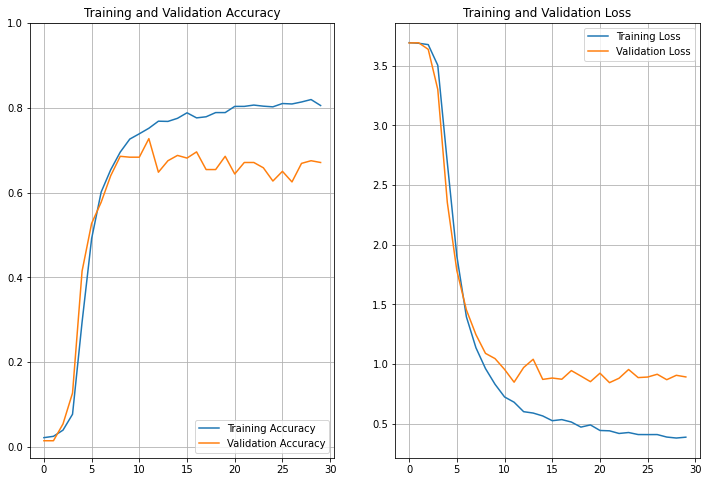

In [198]:
def plot_history(history, metric, val_metric):
  acc = history.history[metric]
  val_acc = history.history[val_metric]

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(len(acc))

  fig=plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylim([min(plt.ylim()),1])
  plt.grid(True)
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()
  fig.savefig('traininghistory.pdf')

plot_history(history, 'accuracy', 'val_accuracy')

# Conclusion

As you can see above, we did implement the CNN model for the Olivetti-faces-datasets. If we compare the PCA+SVM with this CNN model, we can easily say that CNN gives more flexibility. And we do not need to select the feature manully like PCA. CNN back propogaiton take care of the weights that need to assign to each features. 